# Objective : Apply SVM on the given data set with proper EDA & Pre-Processing

### import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns   

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df_test = pd.read_csv('pulsar_data_test.csv')
df_train = pd.read_csv('pulsar_data_train.csv')

df = pd.concat([df_train,df_test],ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [4]:
df.head(2)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.15625,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.96875,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0


In [5]:
df.tail(3)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17895,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN
17897,110.679688,38.252642,0.459937,1.690689,4.434783,22.201794,5.939747,39.781374,NaN


In [6]:
df.shape

(17898, 9)

In [7]:
df['target_class'].value_counts()

target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

Clearly, this dataset has humongous class imbalance

In [8]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


### Handling Missing Values

In [9]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       2502
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1702
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     869
target_class                                     5370
dtype: int64

In [10]:
# Calculate the percentage of missing values per column
percentage_of_missing_values = df.isnull().mean() * 100

# Display the missing percentage
percentage_of_missing_values

 Mean of the integrated profile                   0.000000
 Standard deviation of the integrated profile     0.000000
 Excess kurtosis of the integrated profile       13.979216
 Skewness of the integrated profile               0.000000
 Mean of the DM-SNR curve                         0.000000
 Standard deviation of the DM-SNR curve           9.509442
 Excess kurtosis of the DM-SNR curve              0.000000
 Skewness of the DM-SNR curve                     4.855291
target_class                                     30.003352
dtype: float64

In [11]:
#check duplicated in dataset
df.duplicated().sum()

0

In [12]:
# view the column names of the dataframe
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [13]:
# remove leading spaces from column names
df.columns=df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [14]:
# Identify columns with null values
null_columns = df.columns[df.isnull().any()]

# Calculate the mean and median for columns with null values
means = df[null_columns].mean()
medians = df[null_columns].median()

# Round the mean and median values
means = means.round(2)
medians = medians.round(2)

# Print the mean and median for each column with null values
for column in null_columns:
    print(f"{column}: Mean = {means[column]}, Median = {medians[column]}")


Excess kurtosis of the integrated profile: Mean = 0.48, Median = 0.22
Standard deviation of the DM-SNR curve: Mean = 26.37, Median = 18.46
Skewness of the DM-SNR curve: Mean = 104.73, Median = 82.77
target_class: Mean = 0.09, Median = 0.0


### Recommendation:
    - For Continuous Features: Given that your features (except the target_class) are continuous and the distributions might be skewed (based on the difference between mean and median), median imputation could be a good choice. It is less affected by outliers and will handle skewed data better.
    
    - For the Target Class: Since target_class is a binary feature with a mean of 0.09 and median of 0.0, you might use the median value of 0.0 for imputation. This choice depends on how critical accurate imputation is for model performance..

In [15]:
# Impute missing values by replacing them with the median or mean
df['Excess kurtosis of the integrated profile'] = df['Excess kurtosis of the integrated profile'].fillna(df['Excess kurtosis of the integrated profile'].median())
df['Standard deviation of the DM-SNR curve'] = df['Standard deviation of the DM-SNR curve'].fillna(df['Standard deviation of the DM-SNR curve'].median())
df['Skewness of the DM-SNR curve'] = df['Skewness of the DM-SNR curve'].fillna(df['Skewness of the DM-SNR curve'].median())
df['target_class'] = df['target_class'].fillna(df['target_class'].median())


### Visualize Outliers in Dataset

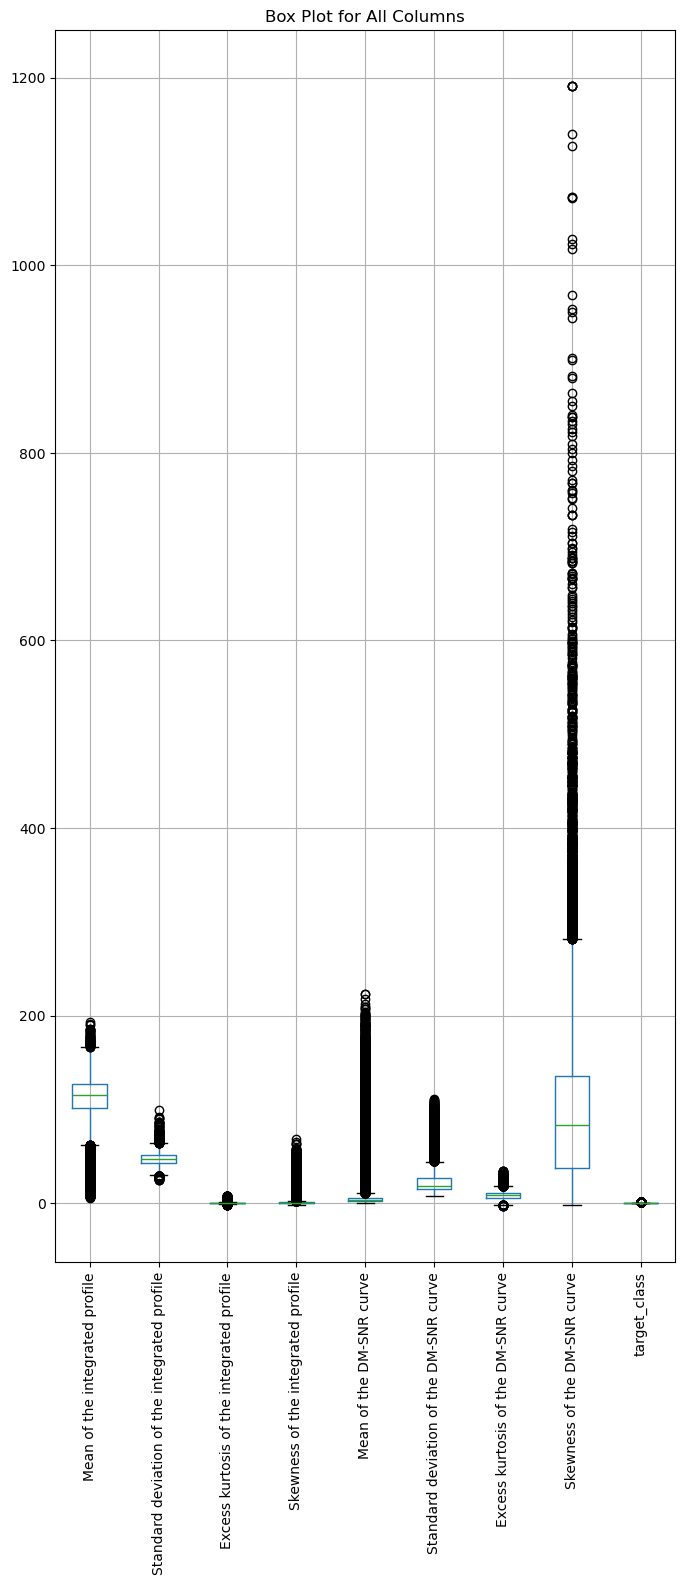

In [16]:
# Create a box plot for all columns
plt.figure(figsize=(8, 16))  
df.boxplot(figsize=(8, 16))
plt.title('Box Plot for All Columns')

# Rotate x labels for better readability
plt.xticks(rotation=90)  
plt.show()

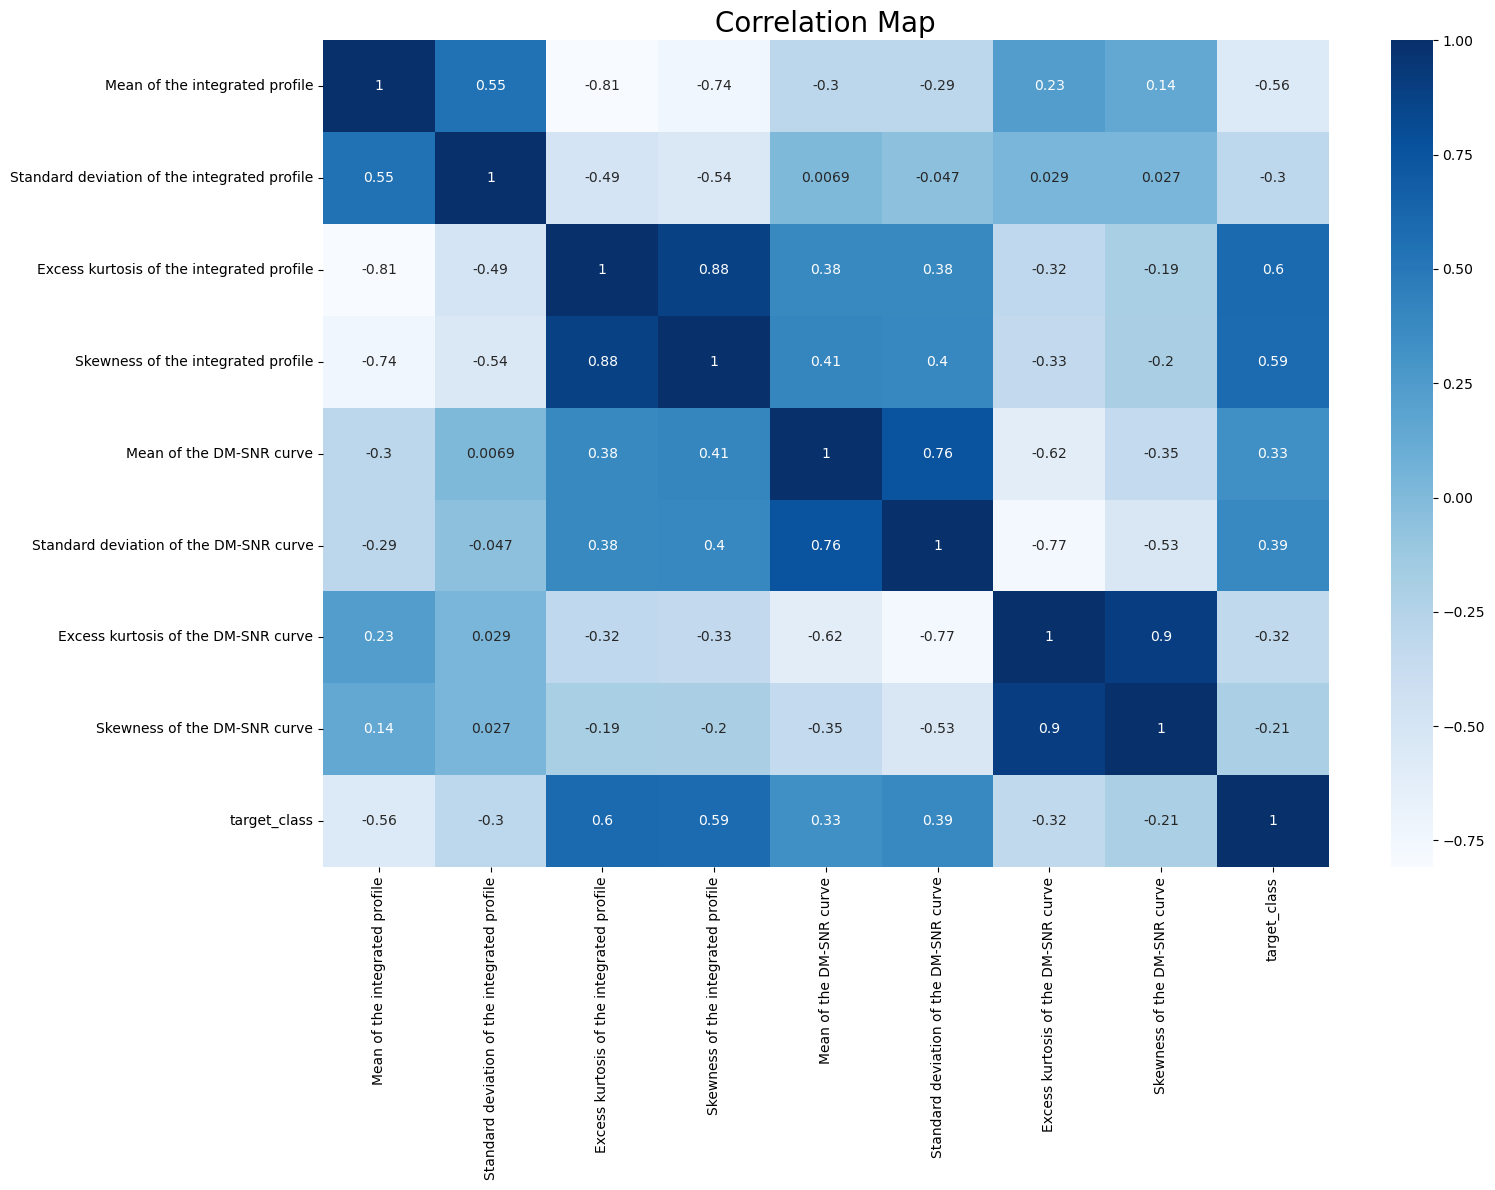

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(data= df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show()

#### Most of our Columns are already related or derived from one or another. And we can see it clearly on some Cells above

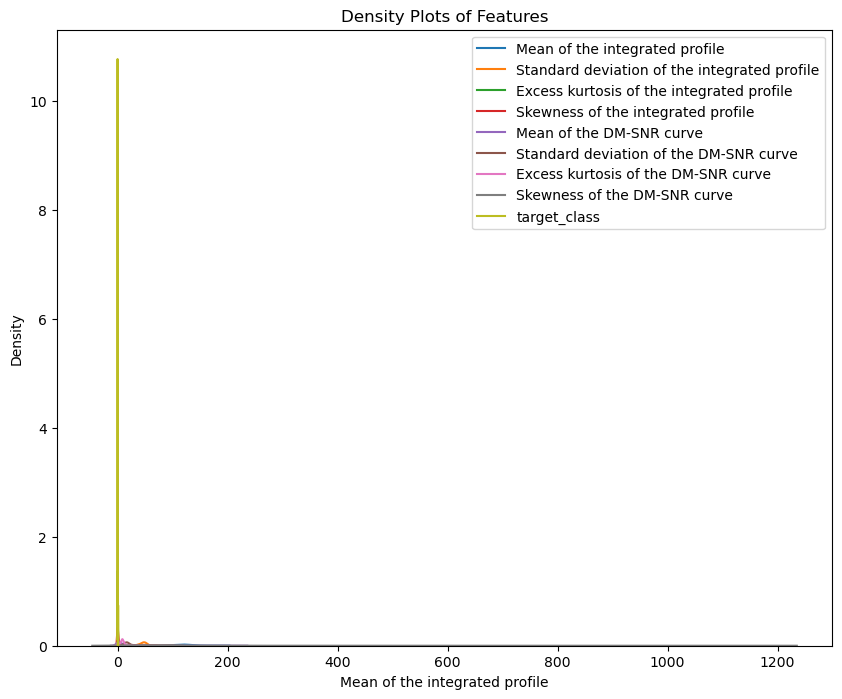

In [18]:
# Density Plots
plt.figure(figsize=(10, 8))
for column in df.columns:
    sns.kdeplot(df[column], label=column)
plt.legend()
plt.title('Density Plots of Features')
plt.show()

### Identify features & target

In [19]:
feature = df.drop('target_class', axis='columns')
target = df.target_class

In [20]:
feature.sample(3)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
5094,119.828125,51.899860,0.224414,-0.440255,2.228261,13.840488,10.262797,138.582077
15181,180.218750,49.495255,-1.604829,2.159695,164.149666,91.613374,-0.712547,-1.079011
4286,99.570312,41.594336,0.224414,0.759190,5.571070,25.197265,5.321425,30.946237


In [21]:
target.sample(3)

17288    0.0
5418     0.0
8854     0.0
Name: target_class, dtype: float64

In [22]:
target.unique()

array([0., 1.])

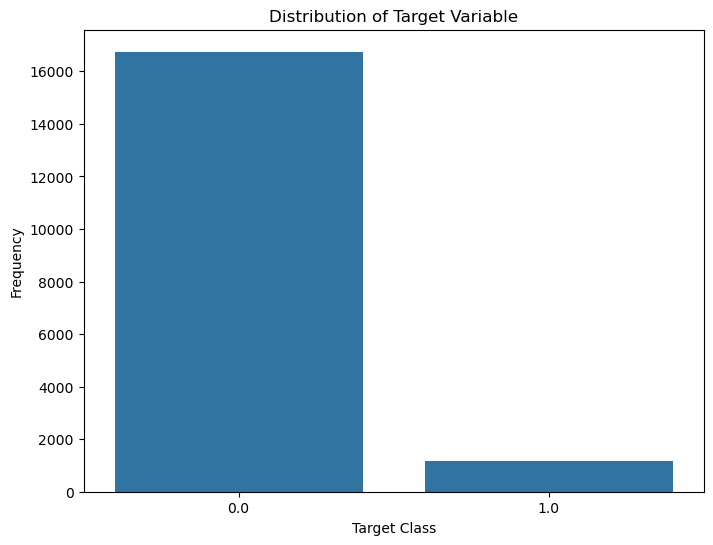

In [23]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=target)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.show()


### Split The Data
Split dataset into training and test sets before applying any transformations or scaling. This ensures that the test data remains unseen during training and preprocessing.

In [24]:
# Construct the training and testing splits 
X_train, X_test , y_train, y_test = train_test_split(feature , target , test_size=0.2 , random_state = 42)

### Feature Scaling:

In [25]:
# Initialize and apply transformations
transformer = PowerTransformer()

X_train_transformed = transformer.fit_transform(X_train)

X_test_transformed = transformer.transform(X_test)

#### we have to apply tranformer first beacuse
1. our data is highly skewed:
       Applied transformations to reduce the skewness of features, making the data distribution more normal and improving model performance.
2. data has many Outliers:
       Used transformations to mitigate the impact of outliers, resulting in a more robust model.
3. Improve Model Accuracy:
       Enhanced the effectiveness of machine learning algorithms that assume normally distributed features by applying suitable transformations.
4. Ensure Balanced Feature Contribution:
       Scaled features to ensure that each feature contributes equally to the model, preventing features with larger scales from dominating the model.
5. Enhance Data Interpretability:
       Used transformations to make data relationships more interpretable, facilitating better understanding and analysis.

In [26]:
X_test_transformed

array([[ 1.31610999e-03, -2.09952437e-01, -4.47517984e-02, ...,
        -9.58750832e-02,  1.86246296e-02,  1.24360399e-02],
       [ 4.84567681e-01,  5.36111553e-01, -9.88459516e-01, ...,
        -9.58750832e-02,  3.18271725e-01,  2.75144908e-01],
       [ 3.87567962e-01, -1.40861636e-01, -1.06574996e-01, ...,
        -9.58750832e-02, -2.02471283e+00, -2.22028702e+00],
       ...,
       [-2.31170141e-01,  2.47132596e-02, -4.26898498e-02, ...,
         3.87167966e-01, -2.27286508e-01, -2.68061984e-01],
       [ 8.93381609e-01,  1.79804969e+00, -7.85565390e-01, ...,
        -2.71096887e-01,  3.40738136e-01,  2.98449885e-01],
       [-2.91770058e-01,  2.56312396e-01,  3.93961614e-01, ...,
        -3.36841602e-02, -1.51969078e-01, -1.74512626e-01]])

In [27]:
X_train_transformed 

array([[ 0.23989399,  1.63742254,  0.26908153, ..., -1.37170905,
         0.96716122,  1.12231739],
       [-1.28401846, -1.27090167,  0.66227288, ..., -0.09587508,
         0.50833229,  0.57042476],
       [-0.02836836, -0.6455363 ,  0.1559971 , ..., -1.04325564,
         0.38118061,  0.62698011],
       ...,
       [-2.4821587 , -1.67144058,  3.01901392, ...,  1.58285976,
        -1.70477078, -1.69826483],
       [-0.38588531,  0.22508375, -0.04268985, ...,  0.18064337,
        -0.18165774, -0.18626767],
       [ 0.89554891, -1.67516238, -0.59894322, ..., -0.54194692,
         0.80659538,  0.7829208 ]])

In [28]:
# Fit the scaler on the training data and transform it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.32247541,  1.64412094, -0.05618607, ..., -0.73660581,
         0.97251436,  1.025802  ],
       [-1.14085361, -1.26876307,  0.20022516, ..., -0.38363956,
         0.48017381,  0.29461341],
       [ 0.1051674 , -0.64813284, -0.11940978, ..., -0.67033632,
         0.34640321,  0.36079247],
       ...,
       [-3.90163929, -1.66435859,  5.14276936, ...,  1.59519879,
        -1.61787185, -0.98739778],
       [-0.20527261,  0.22142278, -0.22100128, ..., -0.25519957,
        -0.23021702, -0.41207137],
       [ 0.80944015, -1.66802708, -0.45296571, ..., -0.54115617,
         0.79856914,  0.55343972]])

In [29]:
# Transform the test data with the same scaler
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.12981999, -0.21384723, -0.22199692, ..., -0.38363956,
        -0.02808144, -0.25750475],
       [ 0.5108699 ,  0.53350903, -0.58101786, ..., -0.38363956,
         0.28067344, -0.01989745],
       [ 0.43721648, -0.1448192 , -0.25132419, ..., -0.38363956,
        -1.85684187, -1.0146484 ],
       ...,
       [-0.06770508,  0.02076011, -0.22100128, ..., -0.13711841,
        -0.27576373, -0.46963939],
       [ 0.80791838,  1.80678688, -0.51702795, ..., -0.45163267,
         0.30411222,  0.00306839],
       [-0.12096685,  0.25272479,  0.01871176, ..., -0.35722012,
        -0.20047923, -0.40351165]])

In [50]:
y_train

14453    0.0
15797    0.0
4510     0.0
11899    0.0
895      0.0
        ... 
11284    0.0
11964    0.0
5390     1.0
860      0.0
15795    0.0
Name: target_class, Length: 14318, dtype: float64

####  X_train_scaled and X_test_scaled are now ready for modeling

### Build & Train SVM Model

In [38]:
model = SVC()
# Train the model on the training data
model.fit(X_train_scaled, y_train)

SVC()

In [39]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)


In [40]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
y_pred.dtype

dtype('float64')

In [41]:
# evaluate the model
ConfusionMatrix = confusion_matrix(y_test, y_pred)
EvaluationReport = classification_report(y_test, y_pred)
print(ConfusionMatrix)
print(EvaluationReport)

[[3286   71]
 [  52  171]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3357
         1.0       0.71      0.77      0.74       223

    accuracy                           0.97      3580
   macro avg       0.85      0.87      0.86      3580
weighted avg       0.97      0.97      0.97      3580



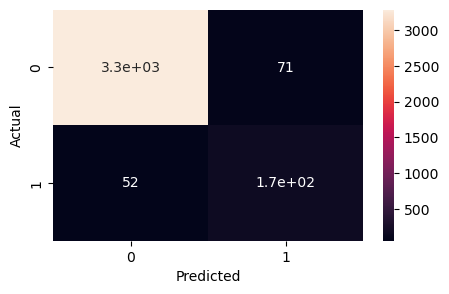

In [42]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Tuning the model

In [37]:
model_C = SVC(  kernel = 'rbf')     
model_C.fit(X_train_scaled, y_train)

SVC()

In [38]:
model_C.score(X_test_scaled, y_test)

0.9656424581005587

### Grid Search is a common technique to systematically try different hyperparameter values and evaluate model performance.

In [48]:
# Define the parameter grid
param_grid = {
    'C': [ 1,2],
    'kernel': ['linear', 'rbf'],
    'gamma': [ 1, 10]  # Only for 'rbf', 'poly', and 'sigmoid' kernels
}

# Initialize the SVM model
svc_grid_search_cv = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc_grid_search_cv , param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [49]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2], 'gamma': [1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [50]:
# Print the best parameters and best score
print("Best parameters found with grid search cv: ", grid_search.best_params_)
print("Best accuracy score with grid search cv: ", grid_search.best_score_)

Best parameters found with grid search cv:  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy score with grid search cv:  0.9558595312570125


In [51]:
# Get the best model
best_model_grid_cv = grid_search.best_estimator_

In [52]:
# Predict on the test set
y_pred_grid_cv = best_model_grid_cv.predict(X_test_scaled)

In [53]:
# evaluate the model
ConfusionMatrix_grid_cv = confusion_matrix(y_test, y_pred_grid_cv)
EvaluationReport_grid_cv = classification_report(y_test, y_pred_grid_cv)
print(ConfusionMatrix_grid_cv)
print(EvaluationReport_grid_cv)

[[3297   60]
 [  61  162]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3357
         1.0       0.73      0.73      0.73       223

    accuracy                           0.97      3580
   macro avg       0.86      0.85      0.86      3580
weighted avg       0.97      0.97      0.97      3580



#### RandomizedSearchCV is a more efficient alternative to GridSearchCV when tuning hyperparameters, especially if you have a large number of parameters or a large search space. Instead of trying every possible combination of parameters, RandomizedSearchCV randomly samples a fixed number of parameter combinations.

In [39]:
# Define the parameter grid
param_dist = {
    'C': [1, 5],                
    'kernel': ['linear', 'rbf'],         
    'gamma': [ 1, 10],       
    'degree': [2, 3 ]                       
}


In [40]:
# Initialize the SVM model
svc_random_search_cv = SVC()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svc_random_search_cv,
    param_distributions=param_dist,
    n_iter=10,                            
    cv=5,                                
    scoring='accuracy',                   
    verbose=1,                             
    random_state=42,                     
    n_jobs=-1   # Use all available cores
)


In [41]:
# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 5], 'degree': [2, 3],
                                        'gamma': [1, 10],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy', verbose=1)

In [42]:
# Print the best parameters and best score
print("Best parameters found with randomized search cv: ", random_search.best_params_)
print("Best accuracy score with randomized serch cv: ", random_search.best_score_)

Best parameters found with randomized search cv:  {'kernel': 'rbf', 'gamma': 1, 'degree': 2, 'C': 1}
Best accuracy score with randomized serch cv:  0.9558595312570125


In [43]:
# Get the best model
best_model_random_search_cv = random_search.best_estimator_

In [44]:
# Predict on the test set
y_pred_random_cv = best_model_random_search_cv.predict(X_test_scaled)

In [46]:
# evaluate the model
ConfusionMatrix_random_cv = confusion_matrix(y_test, y_pred_random_cv)
EvaluationReport_random_cv = classification_report(y_test, y_pred_random_cv)
print(ConfusionMatrix_random_cv)
print(EvaluationReport_random_cv)

[[3297   60]
 [  61  162]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3357
         1.0       0.73      0.73      0.73       223

    accuracy                           0.97      3580
   macro avg       0.86      0.85      0.86      3580
weighted avg       0.97      0.97      0.97      3580



### Save model

In [ ]:
import pickle

# Save the model to disk
with open('svm_model_pulsar_star_dataset.pkl', 'wb') as file:
    pickle.dump(model, file)

# SUMMARY:
In conclusion, after evaluating various configurations, our model with the default parameters has demonstrated exceptional performance, achieving a remarkable accuracy of 97% and an F1 score of 98%. Given these outstanding results, the default parameters provide an optimal balance between precision and recall, making further tuning unnecessary at this stage. Therefore, we will proceed with the default parameters for this model, as they deliver the best overall performance.